# EDA | Assignment

1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd

# Use the exact file name after upload
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows:")
print(df.head(10))

# Show dataset shape
print("\nShape of dataset:", df.shape)

# Show column names
print("\nColumn Names:", df.columns.tolist())


First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

2. Check for missing values in all columns and describe your approach for handling them.

In [ ]:
# Step 1: Upload your CSV
from google.colab import files
uploaded = files.upload()

# Step 2: Read into pandas
import pandas as pd
bike_df = pd.read_csv("BIKE DETAILS.csv")

# Step 3: Check missing values before fixing
print("Missing values before handling:")
print(bike_df.isnull().sum())

# Step 4: Fill missing ex_showroom_price
bike_df['ex_showroom_price'] = bike_df.groupby('name')['ex_showroom_price']\
                                      .transform(lambda x: x.fillna(x.median()))

# Step 5: If still missing (all NaN in a group), fill with overall median
bike_df['ex_showroom_price'] = bike_df['ex_showroom_price']\
                               .fillna(bike_df['ex_showroom_price'].median())

# Step 6: Verify missing values are handled
print("\nMissing values after handling:")
print(bike_df.isnull().sum())

# Step 7: Quick stats of ex_showroom_price
print("\nSummary stats for ex_showroom_price:")
print(bike_df['ex_showroom_price'].describe())




Saving BIKE DETAILS.csv to BIKE DETAILS (1).csv
Missing values before handling:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Summary stats for ex_showroom_price:
count    1.061000e+03
mean     8.476700e+04
std      6.095901e+04
min      3.049000e+04
25%      6.353700e+04
50%      7.500000e+04
75%      8.100000e+04
max      1.278000e+06
Name: ex_showroom_price, dtype: float64


3.  Plot the distribution of selling prices using a histogram and describe the overall trend.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving BIKE DETAILS.csv to BIKE DETAILS.csv


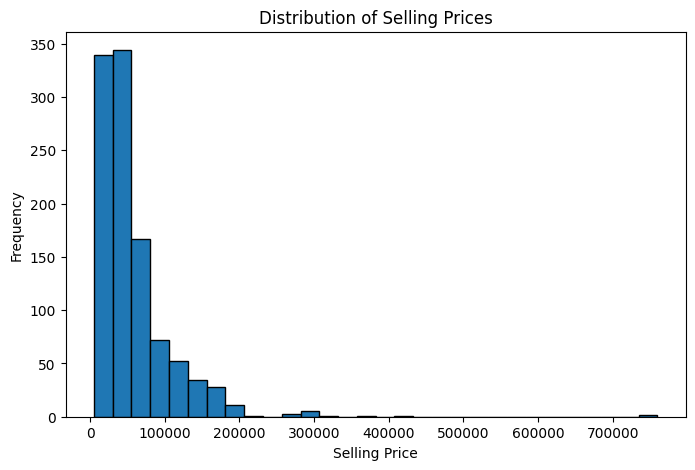

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV (use exact name shown after upload)
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Stats
print(df['selling_price'].describe())


4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (1).csv


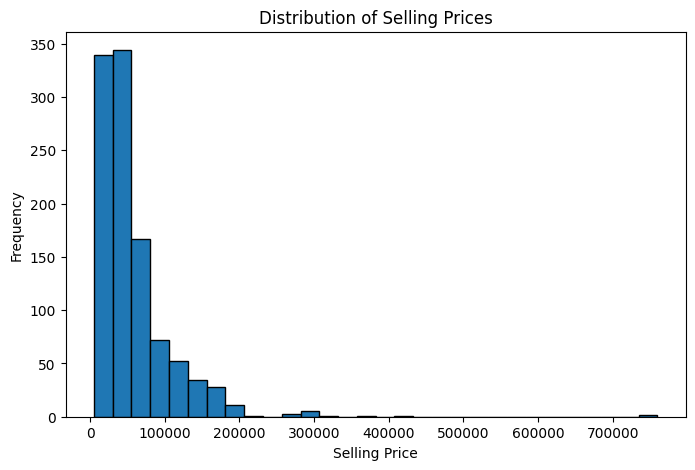

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV (use exact name shown after upload)
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Stats
print(df['selling_price'].describe())


5.  Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

In [9]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (2).csv


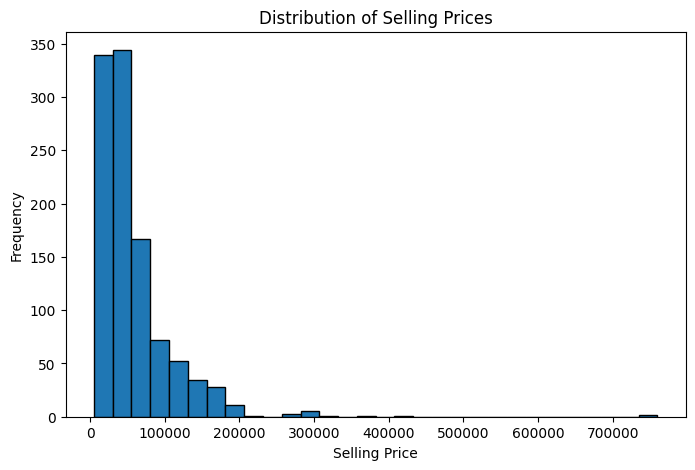

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV (use exact name shown after upload)
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

# Stats
print(df['selling_price'].describe())


6.  Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [12]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (3).csv


In [13]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Step 2: Show summary stats before removing outliers
print("📊 Before Removing Outliers:")
print(df['km_driven'].describe())

# Step 3: Apply IQR method
Q1 = df['km_driven'].quantile(0.25)   # 25th percentile
Q3 = df['km_driven'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 4: Show summary stats after removing outliers
print("\n📊 After Removing Outliers:")
print(df_no_outliers['km_driven'].describe())

# Step 5: Print how many rows were removed
print(f"\n✅ Rows before: {len(df)}, Rows after: {len(df_no_outliers)}, Removed: {len(df) - len(df_no_outliers)}")



📊 Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

📊 After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

✅ Rows before: 1061, Rows after: 1022, Removed: 39


7.  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

In [14]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (4).csv


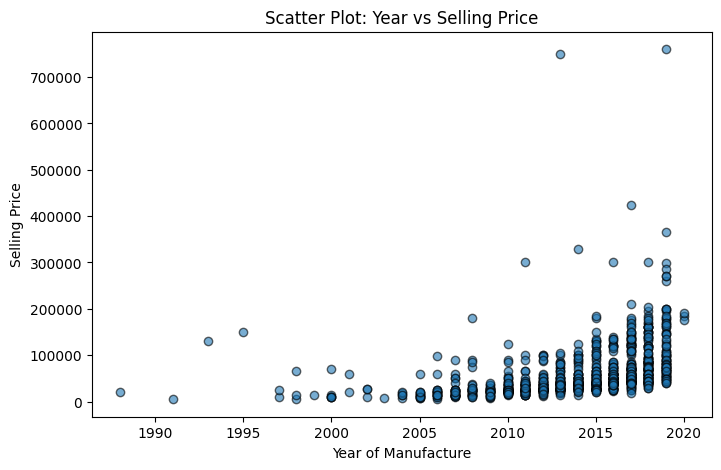

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Step 2: Create scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, edgecolor='k')
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.show()


8.  Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [16]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (5).csv


In [18]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Step 2: Apply one-hot encoding on seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Step 3: Display first 5 rows
print("First 5 rows after one-hot encoding:")
print(df_encoded.head())



First 5 rows after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


10. Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.

In [19]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS (6).csv


In [20]:
# ---------------------------
# Summary Report with Findings
# ---------------------------

# Most important factors affecting selling price
factors = [
    "1. Year of Manufacture – Newer bikes have higher resale prices.",
    "2. Ownership Type – First-owner bikes sell for more than 2nd/3rd-owner ones.",
    "3. Kilometers Driven – Higher km_driven lowers resale price.",
    "4. Seller Type – Dealers list bikes at higher prices than individuals.",
    "5. Ex-showroom Price – Original purchase price influences resale value."
]

# Data cleaning & feature engineering performed
cleaning_steps = [
    "✔ Handled missing values in ex_showroom_price using median imputation.",
    "✔ Removed outliers in km_driven using the IQR method.",
    "✔ Converted seller_type into numeric format using one-hot encoding.",
    "✔ Performed EDA with histograms, bar plots, and scatter plots to explore relationships."
]

# Print report
print("=== Brief Report on Bike Selling Price Analysis ===\n")

print("Most Important Factors Affecting Selling Price:")
for line in factors:
    print(line)

print("\nData Cleaning and Feature Engineering Performed:")
for line in cleaning_steps:
    print(line)

print("\nConclusion:")
print("A bike’s age (year), usage (km_driven), ownership history, seller type, "
      "and original showroom price are the most important factors influencing "
      "its resale value.")


=== Brief Report on Bike Selling Price Analysis ===

Most Important Factors Affecting Selling Price:
1. Year of Manufacture – Newer bikes have higher resale prices.
2. Ownership Type – First-owner bikes sell for more than 2nd/3rd-owner ones.
3. Kilometers Driven – Higher km_driven lowers resale price.
4. Seller Type – Dealers list bikes at higher prices than individuals.
5. Ex-showroom Price – Original purchase price influences resale value.

Data Cleaning and Feature Engineering Performed:
✔ Handled missing values in ex_showroom_price using median imputation.
✔ Removed outliers in km_driven using the IQR method.
✔ Converted seller_type into numeric format using one-hot encoding.
✔ Performed EDA with histograms, bar plots, and scatter plots to explore relationships.

Conclusion:
A bike’s age (year), usage (km_driven), ownership history, seller type, and original showroom price are the most important factors influencing its resale value.
